<h1 style="text-align:center;font-size:200%;;">Heart Attack</h1>
<h2 style="text-align:center;font-size:100%;;">Classification using K Neighbors Classifier</h2><br>
<h4 style="text-align:left;">Réaliser par  :  Marouan Daghmoumi & Abderrazzak El Bourkadi & Chaimae chouaa</h4>
<h4 style="text-align:left;">Encadré par  : Pr. Abdellah AZMANI & Loubna Bouhsaien </h4>

####  "Heart Attack Analysis & Prediction Dataset" est une collection d'informations médicales qui vise à analyser et prédire le risque d'attaque cardiaque chez les individus. Voici une description des différentes variables présentes dans ce jeu de données :

- **Age**: Âge du patient

- **Sex**: Sexe du patient(1 = male ; 0 = female)

- **exang**: Angine induite par l'exercice (1 = oui ; 0 = non)

- **ca**: Angine induite par l'exercice (1 = oui ; 0 = non)

- **cp**: Type de douleur thoracique

  - Value 1: Angine typique
  - Value 2: Angine atypique
  - Value 3: Douleur non angineuse
  - Value 4: Asymptomatique

- **trtbps**: Pression artérielle au repos (en mm Hg)

- **chol**: Cholestérol en mg/dl obtenu via un capteur BMI

- **fbs**: Glycémie à jeun > 120 mg/dl (1 = vrai ; 0 = faux)

- **rest_ecg**: Résultats électrocardiographiques au repos

  - Value 0: Normal
  - Value 1: Présence d'anomalies de l'onde ST-T (inversions de l'onde T et/ou élévation ou dépression de > 0,05 mV)
  - Value 2: Montrant une hypertrophie ventriculaire gauche probable ou définitive selon les critères d'Estes

- **thalach**: Fréquence cardiaque maximale atteinte

- **target**: 

  - 0 = Moins de chances d'attaque cardiaque
  - 1 = Plus de chances d'attaque cardiaque


<h2 style="text-align:center;font-size:100%;;">Objectif</h2>
<h4 style="text-align:left;">L'objectif c'est l'utilisation de l'apprentissage automatique pour la classification des crises cardiaques consiste à analyser et prédire les résultats en se basant sur un ensemble de données spécifiquement conçu pour l'analyse et la prédiction des crises cardiaques. Ce processus implique généralement la création d'un modèle de machine learning qui peut identifier des modèles et des caractéristiques dans les données liées aux crises cardiaques, permettant ainsi de classer de manière automatique et précise les cas de crises cardiaques.

</h4>

## 1. L'importation des bibliothèques

In [1]:
# Importation de la bibliothèque Seaborn pour la visualisation de données
import seaborn as sns
# Importation de la bibliothèque Matplotlib pour la création de graphiques
import matplotlib.pyplot as plt
# Importation de la bibliothèque Pandas pour la manipulation de données sous forme de DataFrame
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Importation de la fonction train_test_split de scikit-learn pour diviser le jeu de données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
# Importation de la bibliothèque numpy pour le calcul numérique
import numpy as np
# Importation de la classe KNeighborsClassifier de scikit-learn pour le modèle des k plus proches voisins
from sklearn.neighbors import KNeighborsClassifier
# Importation de différentes fonctions d'évaluation de modèle de scikit-learn
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)


## 2. Importation des données

In [2]:
# Utilisation de Pandas pour lire un fichier CSV et créer un DataFrame
data = pd.read_csv('heart.csv')

In [3]:
# Affichage du contenu du DataFrame 'data'
print(data)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

## 3. exploration et visualisation des données

In [4]:
# Affichage des 10 premières lignes du DataFrame 'data'
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
# Affichage des 10 dernier lignes du DataFrame 'data'
data.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Affichage des dimensions du DataFrame 'data'
data.shape

(303, 14)

##### Alors on a 13 features et 303 exemple

Le nombre d'exemples avec output égal à 0 est : 138
Le nombre d'exemples avec output égal à 1 est : 165


Text(0.5, 1.0, 'Distribution des valeurs de la variable cible')

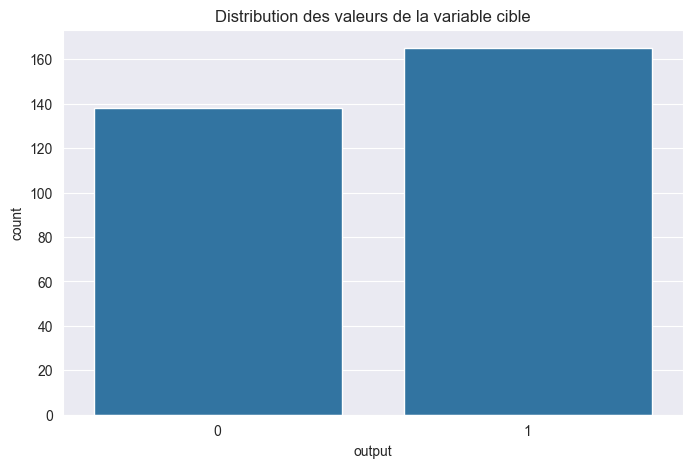

In [7]:
# Afficher le nombre d'exemples avec output égal à 0
count_output_1 = (data['output'] == 1).sum()

# Afficher le nombre d'exemples avec output égal à 1
count_output_0 = (data['output'] == 0).sum()

# Imprimer le nombre d'exemples avec output égal à 0 et à 1
print(f"Le nombre d'exemples avec output égal à 0 est : {count_output_0}")
print(f"Le nombre d'exemples avec output égal à 1 est : {count_output_1}")

# Créer un graphique de comptage pour visualiser la distribution des valeurs de la variable cible
plt.figure(figsize=(8, 5))
sns.countplot(x=data['output'])
plt.title("Distribution des valeurs de la variable cible", size=12)

###### On va maintenant visualiser les features et observer la distribution statistique de leurs valeurs. Ce code se concentre sur cela. Il offre une représentation graphique sous forme de boxplots pour chaque variable présente dans le DataFrame.

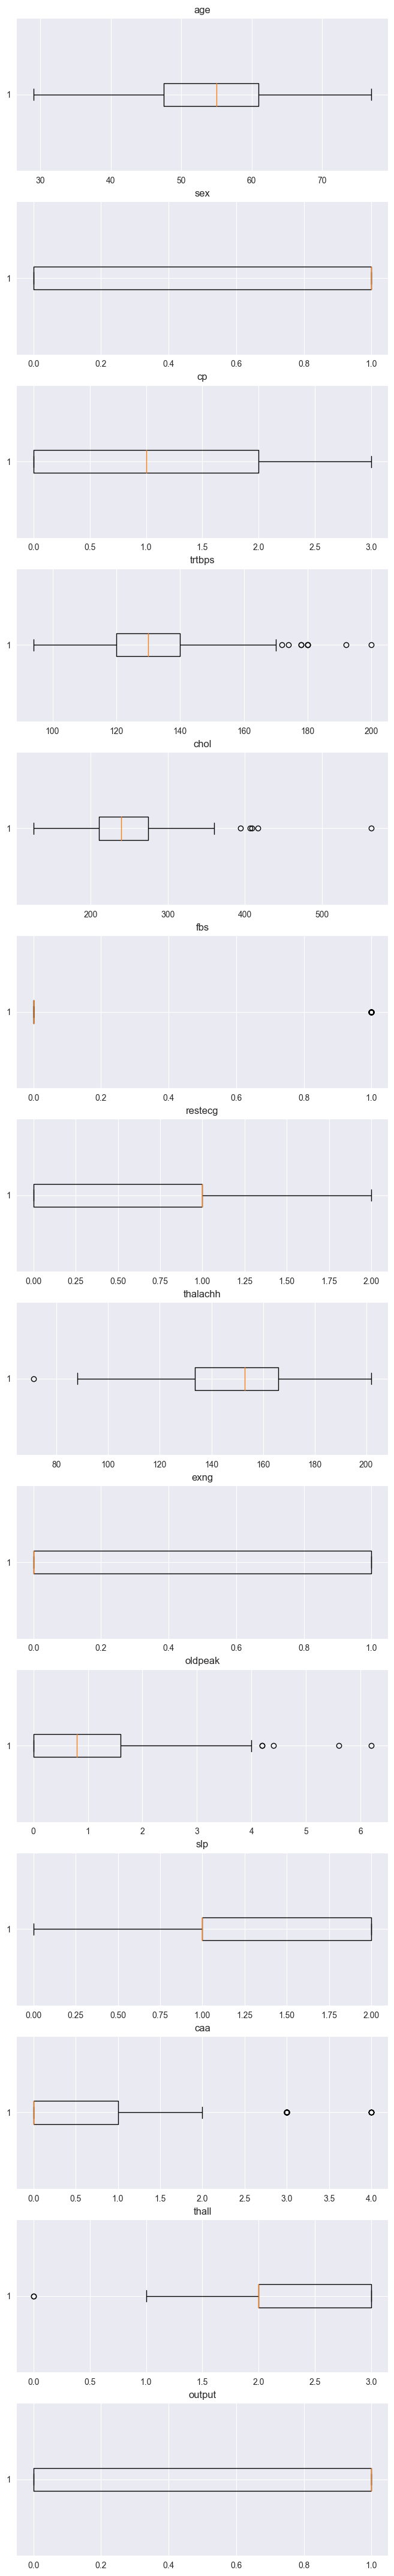

In [8]:
# Obtention de la liste des noms de colonnes du DataFrame data
col = data.columns

# Création d'une figure avec plusieurs sous-graphiques, un pour chaque colonne
# La taille de la figure est spécifiée comme 8 pouces de largeur par 55 pouces de hauteur
fig, ax = plt.subplots(len(data.columns), 1, figsize=(8, 55))

# Utilisation d'une boucle pour itérer à travers chaque colonne et créer un boxplot
for ind, axi in enumerate(ax.flat):
    # Création du boxplot pour la colonne correspondante
    axi.boxplot(data[col[ind]], vert=False)
    
    # Définition du titre du boxplot avec le nom de la colonne
    axi.set_title(col[ind], size=12)

# Affichage de la figure avec les boxplots
plt.show()

#### on calcule la corrélations pour  mettre en évidence les caractéristiques potentiellement importantes pour la prédiction de la sortie (output) attaques cardiaques.

<Axes: >

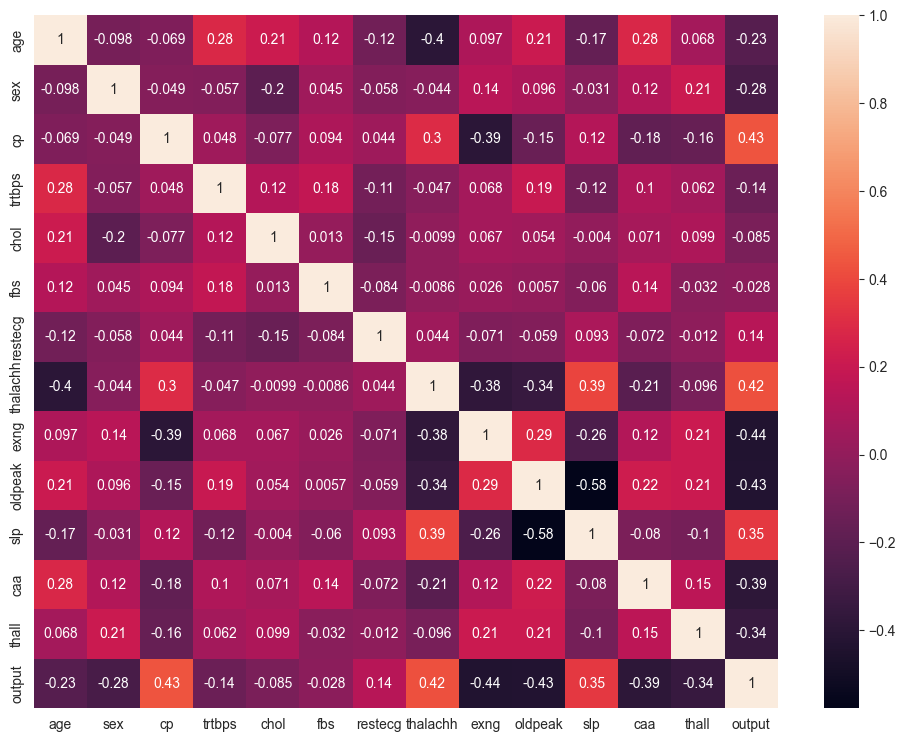

In [9]:
cor = data.corr()
plt.figure(figsize =  (12,9))
sns.heatmap(cor, annot = True)

In [10]:
rel = cor['output'].sort_values(ascending = False)
rel

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [11]:
l = []
for i in range (len(rel)):
    if rel[i] > 0:
        l.append(rel.index[i])
l

/var/folders/f9/l861j34x6435fvkrx5d05bmc0000gn/T/ipykernel_11101/4055984129.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if rel[i] > 0:


['output', 'cp', 'thalachh', 'slp', 'restecg']

#### ' cp ', ' thalachh ', ' slp ' et ' restecg ', ayant une influence positive sur la prédiction de la variable cible. 

### 3.1. L'exploration data des individus ayant plus de chances d'attaque cardiaque

In [12]:
# Création d'un nouveau DataFrame 'attack' contenant les lignes où 'output' est égal à 1 (Plus de chances d'attaque cardiaque)
attack = data[data['output'] == 1]

In [13]:
# Affichage personnes ayant une chance d'avoir une crise cardiaque
attack

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
# Affichage du nombre de personnes ayant une chance d'avoir une crise cardiaque
print('Le nombre de personnes qui ont une chance d\'avoir une crise cardiaque est :', len(attack))

Le nombre de personnes qui ont une chance d'avoir une crise cardiaque est : 165


In [15]:
# Affichage du pourcentage de personnes ayant une chance d'avoir une crise cardiaque par rapport au total
print('Le pourcentage des personnes qui ont une chance d\'avoir une crise cardiaque est : {:.2%}'.format(len(attack) / len(data)))

Le pourcentage des personnes qui ont une chance d'avoir une crise cardiaque est : 54.46%


### 3.2. L'exploration data des individus ayant moins de chances d'attaque cardiaque


In [16]:
# Création d'un nouveau DataFrame 'less_attack' contenant les lignes où 'output' est égal à 0 (Moins de chances d'attaque cardiaque)
less_attack = data[data['output'] == 0]

In [17]:
#afficher personnes ayant une chance d'avoir une crise cardiaque
less_attack

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
# Affiche le nombre de personnes ayant moins de risques d'attaque cardiaque
print('Le nombre de personnes qui ont une chance d\'avoir moins de risques d\'attaque cardiaque est :', len(less_attack))


Le nombre de personnes qui ont une chance d'avoir moins de risques d'attaque cardiaque est : 138


In [19]:
print('Le pourcentage des personnes qui ont une chance d\'avoir moins de risques d\'attaque cardiaque est : {:.2%} '.format(len(less_attack) / len(data)))

Le pourcentage des personnes qui ont une chance d'avoir moins de risques d'attaque cardiaque est : 45.54% 


# 4. préparation des données pour l'entrainement  

### 4.1. traitement des valeurs manquantes

In [20]:
# Utilisation de la méthode isnull() pour obtenir un DataFrame de valeurs booléennes,
# Ensuite, la méthode sum() est appliquée pour obtenir la somme des valeurs True par colonne.
values = data.isnull().sum()

# Affichage du nombre de valeurs manquantes par colonne.
# et les valeurs sont le nombre de valeurs manquantes dans cette colonne.
values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: >

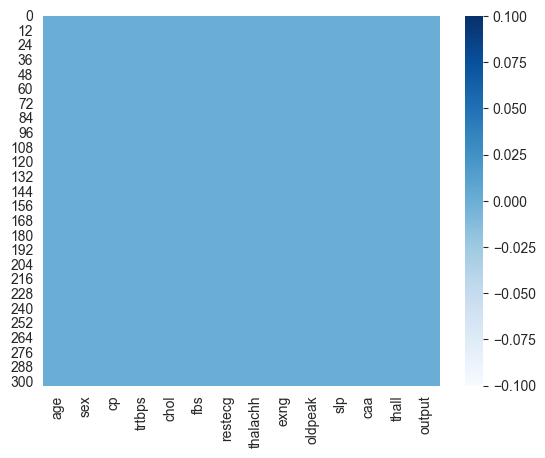

In [21]:
# affichage des données manquantes
sns.heatmap(data.isnull(), cmap = 'Blues')

#### On remarque que nous n'avons pas de valeurs manquantes.

## 5. division de données

In [22]:
# Séparation des caractéristiques X et de la variable cible y
X = data.drop('output', axis=1)  # X contient les caractéristiques en excluant la variable cible 'output'
col = X.columns  # Liste des noms de colonnes de X
std = StandardScaler()  # Création d'une instance de StandardScaler pour la standardisation
X = std.fit_transform(X)  # Application de la standardisation aux caractéristiques X
X = pd.DataFrame(data=X, columns=col)  # Création d'un nouveau DataFrame avec les caractéristiques standardisées et les mêmes noms de colonnes
y = data['output']

In [23]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [25]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,-1.363869,0.681005,0.032031,-0.663867,0.941846,-0.417635,0.898962,0.540209,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
202,0.400752,0.681005,-0.938515,1.049520,0.458709,-0.417635,-1.005832,-1.690047,1.435481,-0.206705,0.976352,-0.714429,1.123029
196,-0.922713,0.681005,1.002577,1.049520,-0.294985,-0.417635,0.898962,-0.115749,-0.696631,2.208842,-0.649113,-0.714429,-0.512922
75,0.069886,-1.468418,0.032031,0.192827,0.072199,-0.417635,-1.005832,0.496478,-0.696631,0.310912,-0.649113,-0.714429,-0.512922
176,0.621330,0.681005,-0.938515,-0.835206,-0.314310,2.394438,0.898962,0.452748,1.435481,0.310912,0.976352,1.244593,1.123029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.481558,0.681005,1.002577,0.478391,-0.256334,-0.417635,0.898962,0.583939,-0.696631,-0.379244,-0.649113,0.265082,1.123029
71,-0.371269,0.681005,1.002577,-2.148802,-0.372287,-0.417635,0.898962,0.190365,1.435481,-0.896862,0.976352,0.265082,1.123029
106,1.613930,0.681005,1.973123,1.620649,-0.237008,2.394438,-1.005832,-0.815437,-0.696631,-0.810592,-0.649113,0.265082,-0.512922
270,-0.922713,0.681005,-0.938515,-0.663867,0.052874,-0.417635,-1.005832,-0.246940,-0.696631,-0.206705,0.976352,-0.714429,1.123029


In [27]:
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
179,0.290464,0.681005,-0.938515,1.049520,0.574662,-0.417635,-1.005832,-1.646316,1.435481,-0.379244,-0.649113,0.265082,-2.148873
228,0.511041,0.681005,1.973123,2.191778,0.806568,-0.417635,-1.005832,0.409017,-0.696631,-0.724323,-0.649113,-0.714429,1.123029
111,0.290464,0.681005,1.002577,1.049520,-2.324160,2.394438,0.898962,1.021244,-0.696631,-0.724323,0.976352,0.265082,1.123029
246,0.180175,-1.468418,-0.938515,0.135714,3.144951,-0.417635,-1.005832,0.015443,1.435481,0.742260,-0.649113,1.244593,1.123029
60,1.834507,-1.468418,1.002577,-1.234996,0.362082,2.394438,-1.005832,-0.859167,-0.696631,-0.896862,0.976352,0.265082,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,1.613930,0.681005,1.002577,0.478391,0.149501,-0.417635,-1.005832,-0.159479,-0.696631,0.828529,-0.649113,2.224104,1.123029
104,-0.481558,0.681005,1.002577,-0.149851,-0.971377,-0.417635,0.898962,0.583939,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
193,0.621330,0.681005,-0.938515,0.763956,0.690615,-0.417635,-1.005832,-0.334401,1.435481,1.518686,-0.649113,1.244593,1.123029


## 6. L'entrainement du modèle

In [28]:
# KNeighborsClassifier() est une extention du modèle
Classifier = KNeighborsClassifier()
# application de la K Nearest Neighbors sur les données d'entrainement
Classifier.fit(X_train, y_train)

KNeighborsClassifier()

## 7. évaluation du modèle

In [29]:
y_predict_test = Classifier.predict(X_test)

In [30]:
print(y_predict_test)

[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [31]:
print(y_test)

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: output, Length: 61, dtype: int64


<Axes: >

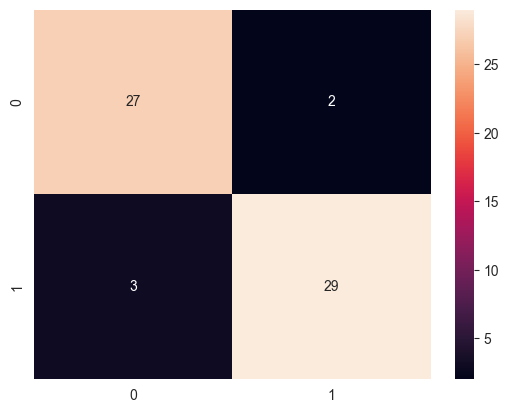

In [32]:
# matrice de confusion
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True) # annot = True pour afficher les nombres dans la matrice

In [33]:
# classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


In [34]:
# calcul accuracy
accuracy = accuracy_score(y_test, y_predict_test)
print("Accuracy using K Nearest Neighbors is: {} %".format(accuracy*100))

Accuracy using K Nearest Neighbors is: 91.80327868852459 %
